# Generate initial head for PFLOTRAN

In [1]:
R.version

               _                           
platform       x86_64-apple-darwin15.6.0   
arch           x86_64                      
os             darwin15.6.0                
system         x86_64, darwin15.6.0        
status                                     
major          3                           
minor          5.0                         
year           2018                        
month          04                          
day            23                          
svn rev        74626                       
language       R                           
version.string R version 3.5.0 (2018-04-23)
nickname       Joy in Playing              

In [2]:
setwd("/Users/shua784/Dropbox/PNNL/Projects/Reach_scale_model/")
paste("Working dir: ", getwd())

[1] "Working dir:  /Users/shua784/Dropbox/PNNL/Projects/Reach_scale_model"

In [3]:
install.packages("pacman")
pacman::p_load(fields, AtmRay, maptools, raster, plot3D, rhdf5, scatterplot3d, akima, rgl, gtools, sp, ggplot2, 
               phylin, geoR, xts, signal) 


The downloaded binary packages are in
	/var/folders/b_/kpbcrn3s4_1770_6k278969jd__sdl/T//RtmpOU0YCf/downloaded_packages


## I/O files

In [67]:
# inputs
imodel=c("200x200x2")
model_dir = "/Users/shua784/Dropbox/PNNL/Projects/Reach_scale_model/"

fname_geoFramework.r = paste(model_dir, "results/geoframework_", imodel, ".r", sep = "")
fname_wells.r = paste(model_dir,"results/well_compiled_wl_data.r", sep = "")
fname.selected.wells.df = paste(model_dir, "results/selected.wells.df_2007-01-01.r", sep = "")

fname_river.geo = paste(model_dir, "data/river_geometry_manual.csv", sep = "")
fname_mass.info = paste(model_dir, "data/MASS1/mass_info.csv", sep = "") 
# well data

fname_mvAwln = paste(model_dir, "data/well_data/mvAwln.csv", sep = "") 
fname_mvAwln_id = paste(model_dir, "data/well_data/mvAwln_wellID_updated.csv", sep = "") 
fname_manual_wells_ids = paste(model_dir, "data/well_data/HYDRAULIC_HEAD_MV_WellID.csv", sep = "")  
fname_manual_wells = paste(model_dir, "data/well_data/HYDRAULIC_HEAD_MV.csv", sep = "") 
fname_USGS_wells = paste(model_dir, "data/well_data/Burns_well_data.csv", sep = "")   
fname_USGS_wells_ids = paste(model_dir, "data/well_data/Burns_well_attributes.csv", sep = "")     
fname_SFA_wells = paste(model_dir, "data/well_data/300A_Well_Data/", sep = "")   
fname_SFA_wells_ids = paste(model_dir, "data/well_data/300A_well_coord.csv", sep = "") 
fname_SFA_wells_all = paste(model_dir, "data/well_data/SFA_all_wells.csv", sep = "") 

# outputs
is.plot = F

fig_initial_H = paste(model_dir, "figures/", sep = "")


fname_initial.h5 = paste(model_dir, "Inputs/HFR_model_", imodel, "_head_bc","/HFR_H_Initial_s.h5", sep = "")
fname.BC.h5 = paste(model_dir, "Inputs/HFR_model_", imodel, "_head_bc","/HFR_H_BC_s.h5", sep = "")

fname_selected_wells_csv = paste(model_dir, "results/selected_wells_040107.csv", sep = "")
fname_selected_wells_unique_csv = paste(model_dir, "results/selected_wells_unique_040107.csv", sep = "")

** `attach()` is a safety wrapper for `load()`, and it attached R object to search path. To see all attached variables, use `ls(pos = 2)`; to detach, use `detach(pos = 2)`.**

In [18]:
# load(fname_geoFramework.r)
attach(fname_geoFramework.r)

ls(pos = 2)

The following object is masked _by_ .GlobalEnv:

    fname_geoFramework.r



[1] "angle"                           "basalt_data"                    
 [3] "cells_basalt"                    "cells_cold_creek"               
 [5] "cells_hanford"                   "cells_model"                    
 [7] "cells_proj"                      "cells_ringold_a"                
 [9] "cells_ringold_e"                 "cells_ringold_lm"               
[11] "cells_river_bath"                "cells_taylor_flats"             
[13] "cold_creek_data"                 "dx"                             
[15] "dy"                              "dz"                             
[17] "east_x"                          "fname_ascii.r"                  
[19] "fname_basalt"                    "fname_cold_creek"               
[21] "fname_fig.basalt2d"              "fname_fig.basalt2d.model"       
[23] "fname_fig.cold_creek_2d"         "fname_fig.cold_creek_2d.model"  
[25] "fname_fig.hanford2d"             "fname_fig.hanford2d.model"      
[27] "fname_fig.ringold_a_2d"          "fname_fig.ringold_a_2d.model"   
[29] "fname_fig.ringold_e_2d"          "fname_fig.ringold_e_2d.model"   
[31] "fname_fig.ringold_lm_2d"         "fname_fig.ringold_lm_2d.model"  
[33] "fname_fig.river_bath_2d"         "fname_fig.river_bath_2d.model"  
[35] "fname_fig.taylor_flats_2d"       "fname_fig.taylor_flats_2d.model"
[37] "fname_geoFramework.r"            "fname_hanford"                  
[39] "fname_model_inputs.r"            "fname_ringold_a"                
[41] "fname_ringold_e"                 "fname_ringold_lm"               
[43] "fname_river_bath"                "fname_taylor_flats"             
[45] "hanford_data"                    "idx"                            
[47] "idy"                             "idz"                            
[49] "model_origin"                    "model_to_proj"                  
[51] "north_y"                         "nx"                             
[53] "ny"                              "nz"                             
[55] "plot.fig"                        "proj_to_model"                  
[57] "range_x"                         "range_y"                        
[59] "range_z"                         "ringold_a_data"                 
[61] "ringold_e_data"                  "ringold_lm_data"                
[63] "river_bath_data"                 "south_y"                        
[65] "taylor_flats_data"               "unit_x"                         
[67] "unit_y"                          "west_x"                         
[69] "x"                               "x0"                             
[71] "xlen"                            "y"                              
[73] "y0"                              "ylen"                           
[75] "z"                               "z0"                             
[77] "zlen"

In [16]:
detach(pos = 2)

## model parameters


In [19]:
## for grids
grid.x = idx
grid.y = idy
grid.nx = nx
grid.ny = ny
# for domain

pred.grid.south = expand.grid(seq(range_x[1]+grid.x/2,range_x[2],grid.x),range_y[1]+grid.y/2) # for South boundary
pred.grid.north = expand.grid(seq(range_x[1]+grid.x/2,range_x[2],grid.x),range_y[2]-grid.y/2) # for North boundary
pred.grid.west = expand.grid(range_x[1]+grid.x/2,seq(range_y[1]+grid.y/2,range_y[2],grid.y)) # for East boundary
pred.grid.east = expand.grid(range_x[2]-grid.x/2,seq(range_y[1]+grid.y/2,range_y[2],grid.y)) # for West boundary
pred.grid.domain = expand.grid(seq(range_x[1]+grid.x/2,range_x[2],grid.x),
                               seq(range_y[1]+grid.y/2,range_y[2],grid.y)) # for domain
colnames(pred.grid.south)=c('x','y')
colnames(pred.grid.north)=c('x','y')
colnames(pred.grid.east)=c('x','y')
colnames(pred.grid.west)=c('x','y')
colnames(pred.grid.domain)=c('x','y')


In [20]:
## time information
start.time = as.POSIXct("2007-03-28 12:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
end.time = as.POSIXct("2015-12-31 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")

dt = 3600  ##secs
times = seq(start.time,end.time,dt)
ntime = length(times)
time.id = seq(0,ntime-1,dt/3600)  ##hourly boundary, why start from 0h?

In [ ]:
BC.south = c()
BC.north = c()
BC.east = c()
BC.west = c()
avail.time.id = c()

In [ ]:
range.xcoods = c(model_origin[1], model_origin[1] + xlen)
range.ycoods = c(model_origin[2], model_origin[2] + ylen)

## load all well data

In [ ]:
# ##==================== read into well data ====================
if (!file.exists(fname_wells.r)) {
  

mvAwln.id = read.csv(fname_mvAwln_id, stringsAsFactors = F)
mvAwln = read.csv(fname_mvAwln, stringsAsFactors = F)
mvAwln.id = transform(mvAwln.id,Easting = as.numeric(Easting),
                      Northing = as.numeric(Northing))
HEIS_auto_wells = subset(mvAwln, select = c("WellName", "WellNumber", "procWaterElevation", "procDate"))
HEIS_auto_wells = transform(HEIS_auto_wells, WellName = as.character(WellName),
                   WellNumber = as.character(WellNumber),
                   procWaterElevation = as.numeric(procWaterElevation),
                   procDate = as.POSIXct(procDate))

manual_wells_ids = read.csv(fname_manual_wells_ids, stringsAsFactors = F)
manual_wells = read.csv(fname_manual_wells, stringsAsFactors = F)
manual_wells = transform(manual_wells, HYD_DATE_TIME_PST = as.POSIXct(HYD_DATE_TIME_PST))

# HEIS_auto_wells = mvAwln
HEIS_auto_wells_ids = mvAwln.id
HEIS_manual_wells = manual_wells
colnames(HEIS_manual_wells)[1:4] = c("WellNumber", "WellName", "procDate", "procWaterElevation")
HEIS_manual_wells_ids = manual_wells_ids

USGS_wells = read.csv(fname_USGS_wells, stringsAsFactors = F)
USGS_wells_ids = read.csv(fname_USGS_wells_ids, stringsAsFactors = F)
USGS_wells_ids = transform(USGS_wells_ids, CP_ID_NUM = as.character(CP_ID_NUM))
USGS_wells = transform(USGS_wells, CP_NUM = as.character(CP_NUM), DATE = as.POSIXct(DATE))
USGS_wells$WLELEVft88 = USGS_wells$WLELEVft88*0.3048 # convert ft to meter
USGS_wells_ids$X_SP_83FT = USGS_wells_ids$X_SP_83FT*0.3048
USGS_wells_ids$Y_SP_83FT = USGS_wells_ids$Y_SP_83FT*0.3048
colnames(USGS_wells)[1:4] = c("WellNumber", "procDate", "Year_fract", "procWaterElevation")
colnames(USGS_wells_ids)[2:4] = c("WellNumber", "Easting", "Northing")

## select USGS wells
USGS_wells_selected.names = USGS_wells_ids$WellNumber[which(USGS_wells_ids$Easting < range.xcoods[2] & USGS_wells_ids$Easting > range.xcoods[1] & 
                                                              USGS_wells_ids$Northing < range.ycoods[2] & USGS_wells_ids$Northing > range.ycoods[1])]
USGS_wells_selected = data.frame(WellName = character(), Easting = numeric(), 
                                 Northing = numeric(), DateTime = as.POSIXct(character()), WL = numeric(), stringsAsFactors = F)

for (iwell in USGS_wells_selected.names) {
  
  manual_well = USGS_wells[which(USGS_wells$WellNumber == iwell), ]
  USGS_wells_selected = rbind(USGS_wells_selected, data.frame(WellNumber = manual_well$WellNumber, WL = manual_well$procWaterElevation,
                                                              DateTime = manual_well$procDate,
                                                              Easting = rep(USGS_wells_ids$Easting[which(USGS_wells_ids$WellNumber == iwell)], length(manual_well$WellNumber)),
                                                              Northing = rep(USGS_wells_ids$Northing[which(USGS_wells_ids$WellNumber == iwell)], length(manual_well$WellNumber)),
                                                              stringsAsFactors = F
  ))
  
  
}


## SFA wells
SFA_wells_ids = read.csv(fname_SFA_wells_ids, stringsAsFactors = F)
colnames(SFA_wells_ids)[2] = c("WellName")
# SFA_wells_list=c("399-1-1_3var.csv")
# iwell = SFA_wells_list

        if (!file.exists(fname_SFA_wells_all)) {
          
        SFA_wells = data.frame(WellName = as.character(), DateTime = as.POSIXct(character()),  Temp = numeric(),
                               Spc = numeric(), WL = numeric(), stringsAsFactors = F)
        SFA_wells_list = list.files(fname_SFA_wells)
        for (iwell in SFA_wells_list) {
          # iwell = "399-1-1_3var.csv"
          iSFA_well = read.csv(paste(fname_SFA_wells, iwell, sep = ""), stringsAsFactors = F)
          # iSFA_well = read.csv(paste(fname_SFA_wells, "399-1-1_3var.csv", sep = ""), stringsAsFactors = F)
        
           colnames(iSFA_well) = c("DateTime", "Temp", "Spc", "WL")
        
           if (iwell %in% c("399-5-1_3var.csv", "399-3-19_3var.csv" ) ) {
             iSFA_well$DateTime = as.POSIXct(iSFA_well$DateTime, format = "%m/%d/%y %H:%M", tz = "GMT") ## time formate must agree with data-column
        
           } else {
           iSFA_well$DateTime = as.POSIXct(iSFA_well$DateTime, format = "%d-%b-%Y %H:%M:%S", tz = "GMT") ## time formate must agree with data-column
           }
        
          id_col = data.frame(WellName = rep(gsub("_3var.csv", "", iwell), dim(iSFA_well)[1]), stringsAsFactors = F)
          iSFA_well = cbind(id_col, iSFA_well)
        
          SFA_wells = rbind(SFA_wells, iSFA_well, stringsAsFactors =F)
        }
        
        # as.POSIXct(strptime(SFA_wells$DateTime[2], "%d-%b-%Y %H:%M:%S"), format = "%d-%m-%Y %H:%M:%S", tz = "GMT")
        # SFA_wells$DateTime = as.POSIXct(SFA_wells$DateTime, format = "%d-%b-%Y %H:%M:%S", tz = "GMT") ## time formate must agree with data-column
        
        write.csv(SFA_wells, file = "/Users/shua784/Dropbox/PNNL/People/Velo/SFA_all_wells.csv", row.names = F)
        } else {
          SFA_wells = read.csv(fname_SFA_wells_all, stringsAsFactors = F)
          SFA_wells = transform(SFA_wells, DateTime = as.POSIXct(DateTime))
        }



save(list = c("HEIS_auto_wells", "HEIS_auto_wells_ids", "HEIS_manual_wells", "HEIS_manual_wells_ids",
              "USGS_wells", "USGS_wells_ids", "USGS_wells_selected", "USGS_wells_selected.names","SFA_wells", "SFA_wells_ids"), file = fname_wells.r)

} else {
    
load(fname_wells.r)
print("well data loaded")
}

## plot well data

In [ ]:
##-------------------- plot all USGS wells------------------------
if (is.plot) {
  

USGS_wells_selected.names = USGS_wells_ids$WellNumber[which(USGS_wells_ids$Easting < range.xcoods[2] & USGS_wells_ids$Easting > range.xcoods[1] & 
                                                              USGS_wells_ids$Northing < range.ycoods[2] & USGS_wells_ids$Northing > range.ycoods[1])]
USGS_wells_selected = data.frame(WellName = character(), Easting = numeric(), 
                                 Northing = numeric(), DateTime = as.POSIXct(character()), WL = numeric(), stringsAsFactors = F)
start.time = as.POSIXct("1990-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
end.time = as.POSIXct("2011-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
jpeg(file="figures/USGS.wells.jpg", width=12, height=16, units="in", res=300)
par(mar =c(4,4,1,1))
plot(0,0,xlim=c(start.time, end.time), ylim = c(100, 305),type = "n", xlab = "Date", ylab = "Water Level (m)",
     axes = F, cex=1.5)
box()
colors = rainbow(100)
for (iwell in USGS_wells_selected.names) {
  
  manual_well = USGS_wells[which(USGS_wells$WellNumber == iwell), ]
  USGS_wells_selected = rbind(USGS_wells_selected, data.frame(WellNumber = manual_well$WellNumber, WL = manual_well$procWaterElevation,
                                                      DateTime = manual_well$procDate,
                                                      Easting = rep(USGS_wells_ids$Easting[which(USGS_wells_ids$WellNumber == iwell)], length(manual_well$WellNumber)),
                                                      Northing = rep(USGS_wells_ids$Northing[which(USGS_wells_ids$WellNumber == iwell)], length(manual_well$WellNumber)),
                                                      stringsAsFactors = F
  ))
  
  lines(manual_well$procDate, manual_well$procWaterElevation, col= sample(colors), lwd = 1 )
  points(manual_well$procDate, manual_well$procWaterElevation, pch=1, cex=1)
  axis.POSIXct(1,at=seq(as.Date("1990-01-01 00:00:00",tz="GMT"),
                        to=as.Date("2011-01-01 00:00:00",tz="GMT"),by="quarter"),
               format="%m/%Y",mgp=c(5,1.7,0),cex.axis=1)
  axis(2,at=seq(100, 305, 5),mgp=c(5,0.7,0),cex.axis=1)
  
}
dev.off()



hist(USGS_wells_selected$DateTime, breaks = 1000, freq = T)

##---------------------- plot all east wells----------------------------
east.wells=c()
pattern = c(glob2rx("15N*"),glob2rx("14N*"), glob2rx("13N*"), glob2rx("12N*"),glob2rx("11N*"), glob2rx("10N*"), glob2rx("09N*"))
east.wells = grep(paste(pattern,collapse = "|"), HEIS_manual_wells_ids$WELL_NAME, value = T)

east.wells.data = data.frame(WellName = character(), Easting = numeric(), 
                            Northing = numeric(), DateTime = as.POSIXct(character()), WL = numeric(), stringsAsFactors = F)

start.time = as.POSIXct("1990-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
end.time = as.POSIXct("2008-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
jpeg(file="figures/east.wells.jpg", width=12, height=16, units="in", res=300)
par(mar =c(4,4,1,1))
plot(0,0,xlim=c(start.time, end.time), ylim = c(150, 305),type = "n", xlab = "Date", ylab = "Water Level (m)",
     axes = F, cex=1.5)
box()
colors = rainbow(100)
for (iwell in east.wells) {
  
  manual_well = HEIS_manual_wells[which(HEIS_manual_wells$WellName == iwell), ]
  east.wells.data = rbind(east.wells.data, data.frame(WellName = manual_well$WellName, WL = manual_well$procWaterElevation,
                                                    DateTime = manual_well$procDate,
                                                    Easting = rep(HEIS_manual_wells_ids$EASTING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)], length(manual_well$WellName)),
                                                    Northing = rep(HEIS_manual_wells_ids$NORTHING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)], length(manual_well$WellName)),
                                                    stringsAsFactors = F
  ))
  
  lines(manual_well$procDate, manual_well$procWaterElevation, col= sample(colors), lwd = 1 )
  points(manual_well$procDate, manual_well$procWaterElevation, pch=1, cex=1)
  axis.POSIXct(1,at=seq(as.Date("1990-01-01 00:00:00",tz="GMT"),
                        to=as.Date("2008-01-01 00:00:00",tz="GMT"),by="quarter"),
               format="%m/%Y",mgp=c(5,1.7,0),cex.axis=1)
  axis(2,at=seq(150, 305, 5),mgp=c(5,0.7,0),cex.axis=1)
  
  # date.range = range(manual_well$procDate)
  # 
  # print(paste(iwell, "has", length(manual_well$procWaterElevation), "obs. points"))
}
dev.off()

hist(east.wells.data$DateTime, breaks = 1000, freq = T)

##---------------------- plot all HEIS manual wells--------------------


start.time = as.POSIXct("1990-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
end.time = as.POSIXct("2017-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
jpeg(file="figures/all.manual.wells.jpg", width=12, height=16, units="in", res=300)
par(mar =c(4,4,1,1))
plot(0,0,xlim=c(start.time, end.time), ylim = c(100, 305),type = "n", xlab = "Date", ylab = "Water Level (m)",
     axes = F, cex=1.5)
box()
colors = rainbow(100)
for (iwell in well_names) {
  
  manual_well = HEIS_manual_wells[which(HEIS_manual_wells$WellName == iwell), ]
  
  lines(manual_well$procDate, manual_well$procWaterElevation, col= sample(colors), lwd = 1 )
  points(manual_well$procDate, manual_well$procWaterElevation, pch=1, cex=1)
  axis.POSIXct(1,at=seq(as.Date("1990-01-01 00:00:00",tz="GMT"),
                        to=as.Date("2017-01-01 00:00:00",tz="GMT"),by="quarter"),
               format="%m/%Y",mgp=c(5,1.7,0),cex.axis=1)
  axis(2,at=seq(150, 305, 5),mgp=c(5,0.7,0),cex.axis=1)
  
}
dev.off()

hist.HEIS = hist(HEIS_manual_wells$procDate, breaks = 1000, freq = T)

}

## Select well data within timeframe 

In [31]:
initial.time = as.POSIXct("2007-04-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")
initial.time = as.POSIXct("2007-01-01 00:00:00",tz="GMT",format="%Y-%m-%d %H:%M:%S")

In [ ]:
well_names = c(unique(HEIS_manual_wells_ids$WELL_NAME), unique(USGS_wells_selected.names), unique(SFA_wells_ids$WellName))

well_names = unique(well_names)
# well_names = c(unique(SFA_wells_ids$WellName)[27:48])

# time_mar = 1*24*3600 #1 day range
time_mar = 15*86400 #15 day range

# times=times[1]
times = initial.time
# itime = times

In [ ]:
itime = initial.time

print(itime)
selected.wells = data.frame(WellName = character(),  WellNumber = character(),
                      Easting = numeric(), 
                      Northing = numeric(), DateTime = as.POSIXct(character()), WL = numeric(), stringsAsFactors = F)


# well_names = c("699-39-79", "199-D3-2", "199-B2-12", "399-5-1")
# well_names = c("399-1-1")
for (iwell in well_names) {

# iwell = c("199-B2-12")
# iwell = c("199-D3-2")

    if (iwell %in% SFA_wells$WellName) {
    #           print(paste(iwell, "(SFA)"))
      manual_well = SFA_wells[which(SFA_wells$WellName == iwell), ]
      index = which.min(abs(as.numeric(manual_well$DateTime - itime)))
      DateTime = manual_well$DateTime[index]

          if (DateTime == itime) {
            WL = manual_well$WL[index]
            selected.wells = rbind(selected.wells, data.frame(WellName = manual_well$WellName[index],
                                                              WellNumber = manual_well$WellName[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = SFA_wells_ids$Easting[which(SFA_wells_ids$WellName == iwell)],
                                                              Northing = SFA_wells_ids$Northing[which(SFA_wells_ids$WellName == iwell)],
                                                              stringsAsFactors = F
            ))
          } else if (DateTime < itime + time_mar & DateTime > itime - time_mar) {
            print(paste(iwell,"has wl within 1day of itime (SFA well)"))
            WLs = manual_well$WL[which(manual_well$DateTime <itime + time_mar & manual_well$DateTime > itime - time_mar)]
            WL = median(WLs)
            selected.wells = rbind(selected.wells, data.frame(WellName = manual_well$WellName[index],
                                                              WellNumber = manual_well$WellName[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = SFA_wells_ids$Easting[which(SFA_wells_ids$WellName == iwell)],
                                                              Northing = SFA_wells_ids$Northing[which(SFA_wells_ids$WellName == iwell)],
                                                              stringsAsFactors = F
            ))
          }
    } else if (iwell %in% HEIS_auto_wells$WellName) {
      # print(paste(iwell, "(mvAwln)"))
      auto_well = HEIS_auto_wells[which(HEIS_auto_wells$WellName == iwell), ]
      index = which.min(abs(as.numeric(auto_well$procDate - itime)))
      DateTime = auto_well$procDate[index]

          ## find wells having data within given time range
          if (DateTime == itime) {
            WL = auto_well$procWaterElevation[index]
            selected.wells = rbind(selected.wells, data.frame(WellName = auto_well$WellName[index],
                                                              WellNumber = auto_well$WellNumber[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = HEIS_manual_wells_ids$EASTING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              Northing = HEIS_manual_wells_ids$NORTHING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              stringsAsFactors = F
            ))
          } else if (DateTime < itime + time_mar & DateTime > itime - time_mar) {
            print(paste(iwell,"has wl within 1day of itime (mvAwln well)"))
            WLs = auto_well$procWaterElevation[which(auto_well$procDate <itime + time_mar & auto_well$procDate > itime - time_mar)]
            WL = median(WLs)
            selected.wells = rbind(selected.wells, data.frame(WellName = auto_well$WellName[index],
                                                              WellNumber = auto_well$WellNumber[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = HEIS_manual_wells_ids$EASTING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              Northing = HEIS_manual_wells_ids$NORTHING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              stringsAsFactors = F
            ))
            }

    } else if (iwell %in% HEIS_manual_wells$WellName) {
      # print(paste(iwell, "(HEIS manual)"))
      manual_well = HEIS_manual_wells[which(HEIS_manual_wells$WellName == iwell), ]
      index = which.min(abs(as.numeric(manual_well$procDate - itime)))
      DateTime = manual_well$procDate[index]

          if (DateTime == itime) {
            WL = manual_well$procWaterElevation[index]
            selected.wells = rbind(selected.wells, data.frame(WellName = manual_well$WellName[index],
                                                              WellNumber = manual_well$WellNumber[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = HEIS_manual_wells_ids$EASTING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              Northing = HEIS_manual_wells_ids$NORTHING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              stringsAsFactors = F
            ))
          } else if (DateTime < itime + time_mar & DateTime > itime - time_mar) {
            print(paste(iwell,"has wl within 1day of itime (manual well)"))
            WLs = manual_well$procWaterElevation[which(manual_well$procDate <itime + time_mar & manual_well$procDate > itime - time_mar)]
            WL = median(WLs)
            selected.wells = rbind(selected.wells, data.frame(WellName = manual_well$WellName[index],
                                                              WellNumber = manual_well$WellNumber[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = HEIS_manual_wells_ids$EASTING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              Northing = HEIS_manual_wells_ids$NORTHING[which(HEIS_manual_wells_ids$WELL_NAME == iwell)],
                                                              stringsAsFactors = F
            ))
          }
    } else if (iwell %in% USGS_wells_selected$WellNumber) {
      # print(paste(iwell, "(USGS)"))
      manual_well = USGS_wells_selected[which(USGS_wells_selected$WellNumber == iwell), ]
      index = which.min(abs(as.numeric(manual_well$DateTime - itime)))
      DateTime = manual_well$DateTime[index]

          if (DateTime == itime) {
            WL = manual_well$WL[index]
            selected.wells = rbind(selected.wells, data.frame(WellName = manual_well$WellNumber[index],
                                                              WellNumber = manual_well$WellNumber[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = USGS_wells_selected$Easting[index],
                                                              Northing = USGS_wells_selected$Northing[index],
                                                              stringsAsFactors = F
            ))
          } else if (DateTime < itime + time_mar & DateTime > itime - time_mar) {
            print(paste(iwell,"has wl within 1day of itime (USGS well)"))
            WLs = manual_well$WL[which(manual_well$DateTime <itime + time_mar & manual_well$DateTime > itime - time_mar)]
            WL = median(WLs)
            selected.wells = rbind(selected.wells, data.frame(WellName = manual_well$WellNumber[index],
                                                              WellNumber = manual_well$WellNumber[index],
                                                              WL = WL,
                                                              DateTime = DateTime,
                                                              Easting = USGS_wells_selected$Easting[index],
                                                              Northing = USGS_wells_selected$Northing[index],
                                                              stringsAsFactors = F
            ))
          }
        } else {
        print(paste("no well data availabe for ", iwell))
    }
    ## sample wells from SFA data

} 

In [ ]:
write.csv(selected.wells, file = fname_selected_wells_csv, row.names = FALSE)

## interpolate for initial head

In [22]:
selected.wells = read.csv(fname_selected_wells_csv)

In [24]:
selected.wells.unique = selected.wells[!duplicated(selected.wells$WellName), ] # remove duplicated wellNames
selected.wells.unique = selected.wells[!duplicated(selected.wells[c("Easting", "Northing")]), ] # remove duplicated well coords
selected.wells.unique = selected.wells.unique[complete.cases(selected.wells.unique), ] # remove rows contain NAs

In [57]:
write.csv(selected.wells.unique, file = fname_selected_wells_unique_csv, row.names = FALSE)

**use inverse distance interpolation**

In [2]:
selected.wells.unique = read.csv(fname_selected_wells_unique_csv)

In [28]:
# expand points to grid
grd = expand.grid(unit_x, unit_y)

# save(grd, file = "results/model_grids.r")

idw.interp = idw(values=selected.wells.unique[,"WL"],
                 coords = selected.wells.unique[,c("Easting","Northing")],
                 grid=grd,
                 method="shepard",
                 p=2)
idw.interp = as.numeric(unlist(idw.interp))

h.initial = array(idw.interp, c(nx, ny))

river.geometry = read.csv(fname_river.geo)

# river.geometry = river.geometry[, 2:3]

quartz_off_screen 
                3

pdf 
  2

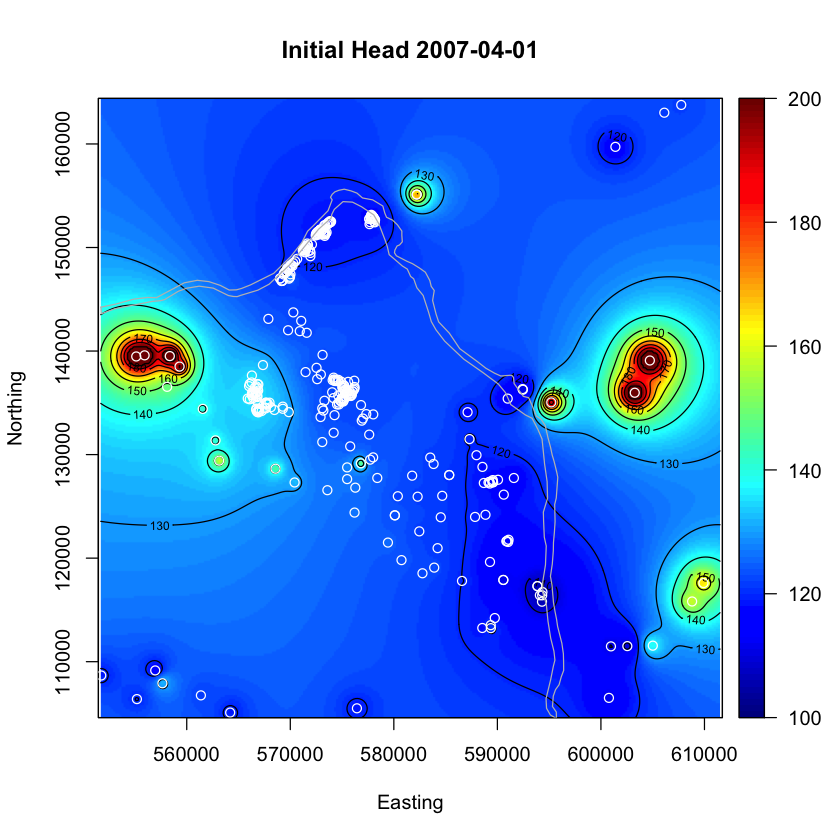

In [53]:
itime = initial.time
fname = paste(fig_initial_H, 'initial_head_200m_040107.jpg', sep = "")
# jpeg(fname, width=8,height=8,units='in',res=300,quality=100)

head4plot = h.initial
head4plot[head4plot>200]=200
image2D(z= head4plot, x= unit_x, y= unit_y, shade=0, rasterImage = T, NAcol = "white",
        main = paste("Initial Head", itime), asp = 1, contour = T, zlim = c(100, 200), xlab = "Easting", ylab = "Northing")
points(selected.wells.unique$Easting, selected.wells.unique$Northing, col = "white", pch = 1, asp=1)
polygon(river.geometry$x, river.geometry$y, border = "gray", asp=1)

dev.copy(jpeg, fname, width = 8, height = 8, units= "in", res = 300)
dev.off()

## interpolate for BC head

In [54]:
## add constant head to inland bc
  grd.east = data.frame(x = pred.grid.east$x + model_origin[1], y = pred.grid.east$y + model_origin[2])
  grd.west = data.frame(x = pred.grid.west$x + model_origin[1], y = pred.grid.west$y + model_origin[2])
  grd.north = data.frame(x = pred.grid.north$x + model_origin[1], y = pred.grid.north$y + model_origin[2])
  grd.south = data.frame(x = pred.grid.south$x + model_origin[1], y = pred.grid.south$y + model_origin[2])

In [58]:
idw.interp.east = idw(values=selected.wells.unique[,"WL"],
                    coords = selected.wells.unique[,c("Easting","Northing")],
                   grid=grd.east,
                   method="shepard",
                   p=2)
  idw.interp.east = as.numeric(unlist(idw.interp.east))
  BC.east = array(idw.interp.east, c(1, ny))
  
  idw.interp.west = idw(values=selected.wells.unique[,"WL"],
                 coords = selected.wells.unique[,c("Easting","Northing")],
                        grid=grd.west,
                        method="shepard",
                        p=2)
  idw.interp.west = as.numeric(unlist(idw.interp.west))
  BC.west = array(idw.interp.west, c(1, ny))
  
  idw.interp.north = idw(values=selected.wells.unique[,"WL"],
                 coords = selected.wells.unique[,c("Easting","Northing")],
                        grid=grd.north,
                        method="shepard",
                        p=2)
  idw.interp.north = as.numeric(unlist(idw.interp.north))
  BC.north = array(idw.interp.north, c(1, ny))
  
  idw.interp.south = idw(values=selected.wells.unique[,"WL"],
                 coords = selected.wells.unique[,c("Easting","Northing")],
                        grid=grd.south,
                        method="shepard",
                        p=2)
  idw.interp.south = as.numeric(unlist(idw.interp.south))
  BC.south = array(idw.interp.south, c(1, ny))

## generate smoothed initial head using Mass1 water level

In [ ]:
# get coord along east, west, north and south boundary
bc.df = grd.east
bc.df["z"] = idw.interp.east

idf = grd.west
idf["z"] = idw.interp.west
bc.df = rbind(bc.df, idf)

idf = grd.north
idf["z"] = idw.interp.north
bc.df = rbind(bc.df, idf)

idf = grd.south
idf["z"] = idw.interp.south
bc.df = rbind(bc.df, idf)

In [62]:
mass.info = read.csv(fname_mass.info)
mass.info.sub = subset(mass.info, select= c(easting, northing, max_wl))
names(mass.info.sub) = c("x", "y", "z")

bc.df = rbind(bc.df, mass.info.sub)

idw.interp = idw(values = bc.df[,"z"],
               coords = bc.df[,c("x","y")],
               grid=grd,
               method="shepard",
               p=2)
idw.interp = as.numeric(unlist(idw.interp))

h.initial.smooth = array(idw.interp, c(nx, ny))

quartz_off_screen 
                3

pdf 
  2

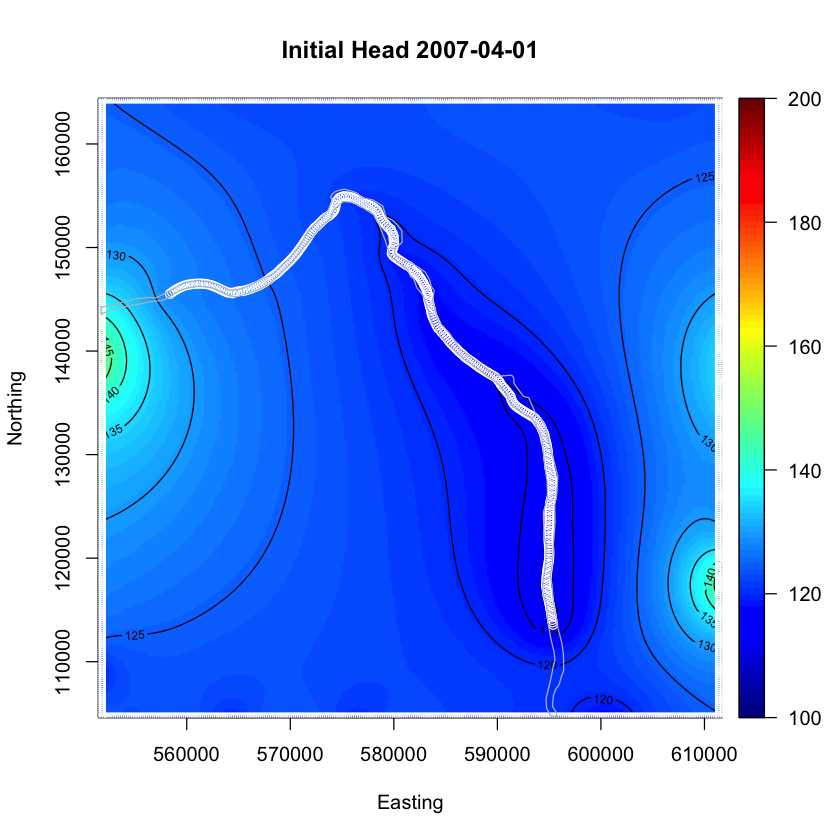

In [63]:
# jpeg("figures/h_initial_smooth_040107.jpg", width=8,height=8,units='in',res=300,quality=100)

head4plot = h.initial.smooth
head4plot[head4plot>200]=200
image2D(z= head4plot, x= unit_x, y= unit_y, shade=0, rasterImage = T, NAcol = "grey",
      main = paste("Initial Head", initial.time), asp = 1, contour = T, zlim = c(100, 200), xlab = "Easting", ylab = "Northing")
points(bc.df$x, bc.df$y, col = "white", pch = 1, asp=1)
polygon(river.geometry$x, river.geometry$y, border = "gray", asp=1)

fname = paste(fig_initial_H, "initial_head_200m_040107s", sep = "")
dev.copy(jpeg, fname,  width=8,height=8,units='in',res=300,quality=100)
dev.off()

# generate H5 output

## initial_h5

In [65]:
##Generate the initial condition hdf5 file for the domain.
if (file.exists(fname_initial.h5)) {
    file.remove(fname_initial.h5)
}
h5createFile(fname_initial.h5)
h5createGroup(fname_initial.h5,'Initial_Head')

h5write(t(h.initial),fname_initial.h5, ## why tranpose? to match HDF5 format
        'Initial_Head/Data',level=0)
fid = H5Fopen(fname_initial.h5)
h5g = H5Gopen(fid,'/Initial_Head')
h5writeAttribute(attr = 1.0, h5obj = h5g, name = 'Cell Centered')
h5writeAttribute.character(attr = "XY", h5obj = h5g, name = 'Dimension')
h5writeAttribute(attr = c(idx, idy), h5obj = h5g, name = 'Discretization')
h5writeAttribute(attr = 500.0, h5obj = h5g, name = 'Max Buffer Size')
h5writeAttribute(attr = c(0, 0), h5obj = h5g, name = 'Origin') 
H5Gclose(h5g)
H5Fclose(fid)

[1] TRUE

[1] TRUE

[1] TRUE

## BC_h5

In [68]:
##=================Generate the BC hdf5 file===========================.

# time.id = as.integer(time.id) 
time.id = as.integer(0) 

if (file.exists(fname.BC.h5)) {
    file.remove(fname.BC.h5)
}

h5createFile(fname.BC.h5)

### write data
h5createGroup(fname.BC.h5,'BC_South')
h5write(time.id, fname.BC.h5,'BC_South/Times',level=0)
h5write(BC.south, fname.BC.h5,'BC_South/Data',level=0)

h5createGroup(fname.BC.h5,'BC_North')
h5write(time.id,fname.BC.h5,'BC_North/Times',level=0)
h5write(BC.north,fname.BC.h5,'BC_North/Data',level=0)

h5createGroup(fname.BC.h5,'BC_East')
h5write(time.id,fname.BC.h5,'BC_East/Times',level=0)
h5write(BC.east,fname.BC.h5,'BC_East/Data',level=0)

h5createGroup(fname.BC.h5,'BC_West')
h5write(time.id,fname.BC.h5,'BC_West/Times',level=0)
h5write(BC.west,fname.BC.h5,'BC_West/Data',level=0)

### write attribute
fid = H5Fopen(fname.BC.h5)
h5g.south = H5Gopen(fid,'/BC_South')
h5g.north = H5Gopen(fid,'/BC_North')
h5g.east = H5Gopen(fid,'/BC_East')
h5g.west = H5Gopen(fid,'/BC_West')


h5writeAttribute(attr = 1.0, h5obj = h5g.south, name = 'Cell Centered')
h5writeAttribute(attr = 'X', h5obj = h5g.south, name = 'Dimension')
h5writeAttribute(attr = grid.x, h5obj = h5g.south, name = 'Discretization')
h5writeAttribute(attr = 200.0, h5obj = h5g.south, name = 'Max Buffer Size')
h5writeAttribute(attr = range_x[1], h5obj = h5g.south, name = 'Origin')
h5writeAttribute(attr = 'h', h5obj = h5g.south, name = 'Time Units')
h5writeAttribute(attr = 1.0, h5obj = h5g.south, name = 'Transient')


h5writeAttribute(attr = 1.0, h5obj = h5g.north, name = 'Cell Centered')
h5writeAttribute(attr = 'X', h5obj = h5g.north, name = 'Dimension')
h5writeAttribute(attr = grid.x, h5obj = h5g.north, name = 'Discretization')
h5writeAttribute(attr = 200.0, h5obj = h5g.north, name = 'Max Buffer Size')
h5writeAttribute(attr = range_x[1], h5obj = h5g.north, name = 'Origin')
h5writeAttribute(attr = 'h', h5obj = h5g.north, name = 'Time Units')
h5writeAttribute(attr = 1.0, h5obj = h5g.north, name = 'Transient')


h5writeAttribute(attr = 1.0, h5obj = h5g.east, name = 'Cell Centered')
h5writeAttribute(attr = 'Y', h5obj = h5g.east, name = 'Dimension')
h5writeAttribute(attr = grid.y, h5obj = h5g.east, name = 'Discretization')
h5writeAttribute(attr = 200.0, h5obj = h5g.east, name = 'Max Buffer Size')
h5writeAttribute(attr = range_y[1], h5obj = h5g.east, name = 'Origin')
h5writeAttribute(attr = 'h', h5obj = h5g.east, name = 'Time Units')
h5writeAttribute(attr = 1.0, h5obj = h5g.east, name = 'Transient')


h5writeAttribute(attr = 1.0, h5obj = h5g.west, name = 'Cell Centered')
h5writeAttribute(attr = 'Y', h5obj = h5g.west, name = 'Dimension')
h5writeAttribute(attr = grid.y, h5obj = h5g.west, name = 'Discretization')
h5writeAttribute(attr = 200.0, h5obj = h5g.west, name = 'Max Buffer Size')
h5writeAttribute(attr = range_y[1], h5obj = h5g.west, name = 'Origin')
h5writeAttribute(attr = 'h', h5obj = h5g.west, name = 'Time Units')
h5writeAttribute(attr = 1.0, h5obj = h5g.west, name = 'Transient')


H5Gclose(h5g.south)
H5Gclose(h5g.north)
H5Gclose(h5g.east)
H5Gclose(h5g.west)
H5Fclose(fid)


[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE